In [168]:
import os

Загрузите нужные библиотеки:
    - pandas, numpy, matplotlib
    - pipelines, стандартизацию, линейную регрессию, гребневую и лассо регрессию с sklearn
    - также загрузите standart scaler, пайплайны и polynomial features

In [169]:
#--Ваш ответ тут --
import pandas as pd
import numpy as np
import matplotlib as mtp
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV, RidgeCV

Используйте магическую комманду в notebook чтобы активировать прорисовку matplotlib графиков

In [170]:
#--Ваш ответ тут --
import matplotlib.pyplot as plt
%matplotlib inline

Поставьте стиль matplotlib **'seaborn'**

In [171]:
#--Ваш ответ тут --
plt.style.use('seaborn')

Данные по оценкам качества ресторанов<br>
Загрузите данные. Для этого используйте кодировку **ISO-8859-1**

In [172]:
#--Ваш ответ тут --
data = pd.read_csv('zomato.csv', encoding='ISO-8859-1')
print(data)

      Restaurant ID                           Restaurant Name  Country Code  \
0           6317637                          Le Petit Souffle           162   
1           6304287                          Izakaya Kikufuji           162   
2           6300002                    Heat - Edsa Shangri-La           162   
3           6318506                                      Ooma           162   
4           6314302                               Sambo Kojin           162   
5          18189371                              Din Tai Fung           162   
6           6300781                                Buffet 101           162   
7           6301290                                   Vikings           162   
8           6300010  Spiral - Sofitel Philippine Plaza Manila           162   
9           6314987                                  Locavore           162   
10          6309903                          Silantro Fil-Mex           162   
11          6309455           Mad Mark's Creamery & 

**Также загрузите названия стран и обьедините оба фрейма по полю "Country Code"**

In [173]:
#--Ваш ответ тут --
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


**Отобразите описание (description) и информацию (information) об датафрейме:**

In [174]:
#--Ваш ответ тут --
data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [175]:
#--Ваш ответ тут --
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
Restaurant ID           9551 non-null int64
Restaurant Name         9551 non-null object
Country Code            9551 non-null int64
City                    9551 non-null object
Address                 9551 non-null object
Locality                9551 non-null object
Locality Verbose        9551 non-null object
Longitude               9551 non-null float64
Latitude                9551 non-null float64
Cuisines                9542 non-null object
Average Cost for two    9551 non-null int64
Currency                9551 non-null object
Has Table booking       9551 non-null object
Has Online delivery     9551 non-null object
Is delivering now       9551 non-null object
Switch to order menu    9551 non-null object
Price range             9551 non-null int64
Aggregate rating        9551 non-null float64
Rating color            9551 non-null object
Rating text             9551 non-null o

**Посмотрим на первые 5 записей.**

In [176]:
#--Ваш ответ тут --
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


Переименуйте колонку *'Aggregate rating'* в *'av_rating'*

In [177]:
#--Ваш ответ тут --
data.rename(columns={'Aggregate rating': 'av_rating'}, inplace=True)
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,av_rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532


Постройте графики показывающие 5 наиболее встречающихся а) страны б) города в датасете <br>
Соотвественно, у вас должно получиться 2 графика -- Если вы нарисуете их в одной фигуре это будет бонус балл (5)

In [178]:
#--Ваш ответ тут --
data2 = pd.DataFrame({'count' : data.groupby( [ "Country Code"] ).size()})
data2.sort_values('count', ascending=False)

,count
Country Code,
1,8652
216,434
215,80
30,60
189,60
214,60
148,40
208,34
14,24


Видно что большиство голосов сосредточено в определенной стране и городе - Что это за город и страна?

 - Индия - Нью Дели
 - США - Нью Дели
 - Британия - Сан-Фрациско
 - Австралия - Макати

In [179]:
###--- Ваш Ответ Тут ---
data2 = pd.DataFrame({'count' : data.groupby( [ "City"] ).size()})
data2.sort_values('count', ascending=False)

,count
City,
New Delhi,5473
Gurgaon,1118
Noida,1080
Faridabad,251
Ghaziabad,25
Bhubaneshwar,21
Lucknow,21
Amritsar,21
Ahmedabad,21


Датасет не совсем чистый. Рестораны которые не имеют оценку, в данных имеют оценку ноль.<br>
Это можно увидеть если узнать частоту показателей в колонке 'Rating text' для "нулевых" ресторанов<br>
**Покажите это**

In [180]:
#--Ваш ответ тут --
data[data['av_rating']==0].shape[0]/data.shape[0]

0.22489791644853943

Соотвественно в выбросьте данные которые не имеют оценку. Но надо сохранить их в отдельном датасете

In [187]:
#--Ваш ответ тут --
data2 = data[data['av_rating']>0]
data2.shape

(7403, 21)

Теперь постройте график на обучающей выборке - Средний рейтинг ресторанов по стране

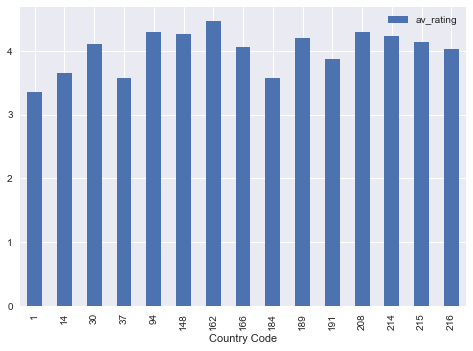

In [188]:
#fig, ax = plt.subplots(figsize=(18, 10))
#--Ваш ответ тут --
averageList = data2.groupby("Country Code")['av_rating'].mean().reset_index()
averageList.plot(x="Country Code",kind='bar')

В обучающей выборке отсейте все рестораны не находящиеся в наиболее часто встречающемся городе

In [189]:
most_frequent_city = data2.groupby('City')['Restaurant ID'].count().idxmax()

In [190]:
#--Ваш ответ тут --
data3 = data2[data2.City==most_frequent_city]
data2

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,av_rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532


Сохраните ваш фрейм в HDF5 файле с помощью метода to_hdf. Он понадобится вам позднее. Запишите его в папку **zomato-restaurants-data**

In [191]:
#--Ваш ответ тут --
data3.to_hdf('zomato-restaurants-data\data.h5', key='data3')

Стоит убрать из данных колонки *Rating color и Rating text* - Они могут дать утечку информации об av_rating <br>
Также стоит убрать колонку *Country, City, Country Code, Restaurant Name и Restaurant ID* как не несущую нужную информацию. <br>
И категориальные колонки со слишком большим количеством уникальных значений <br>
К тому же если использовать one-hot-encoding на таких фичах как *Restaurant ID*, то для новых ресторанов вы просто не сможете дать прогноз!

#### Поменяйте фрейм train_df на свой фрейм

In [192]:
too_verbose_columns = (data3.select_dtypes(include='O')
                               .columns[data3.select_dtypes(include='O').nunique() > 2]
                               .tolist())

In [193]:
columns_to_drop = ['Rating color', 'Rating text', 'Country Code', 'City', 
                   'Country Code', 'Restaurant Name', 'Restaurant ID',]

In [194]:
columns_to_drop.extend(too_verbose_columns)

In [195]:
columns_to_drop = set(columns_to_drop)

In [196]:
data3 = data3.drop(columns_to_drop, axis=1)

Теперь надо сделать преобразовать колонки с категориальными признаками в численные. Для этого используйте
функцию pd.get_dummies и метод select_dtypes

In [197]:
#--Ваш ответ тут --
data4 = pd.get_dummies(data3)

Теперь обьедините новые категориальные фичи с остальными числовыми данными для этого используйте функцию pd.concat

In [198]:
#--Ваш ответ тут --
data4 = data4.drop(['Has Table booking_No','Has Online delivery_No', 'Is delivering now_No'], axis=1)
data4

,Longitude,Latitude,Average Cost for two,Price range,av_rating,Votes,Currency_Indian Rupees(Rs.),Has Table booking_Yes,Has Online delivery_Yes,Is delivering now_Yes,Switch to order menu_No
2561,77.196923,28.535382,350,1,3.2,46,1,0,1,0,1
2562,77.197475,28.535493,1500,3,3.4,45,1,1,1,0,1
2563,77.198033,28.537547,500,2,2.6,11,1,0,0,0,1
2564,77.196924,28.535523,500,2,3.4,238,1,0,1,0,1
2565,77.198122,28.538134,400,1,3.1,8,1,0,0,0,1
2566,77.198159,28.537448,400,1,2.7,64,1,0,1,0,1
2567,77.197950,28.537474,450,1,2.6,113,1,0,1,0,1
2568,77.198042,28.538394,300,1,3.7,66,1,0,1,0,1
2569,77.198808,28.538666,1500,3,3.5,141,1,1,1,0,1
2570,77.196967,28.535763,500,2,2.2,77,1,0,0,0,1


Проверьте размерность вашего фрейма. У вас **не** должны быть сотни колонок

In [199]:
data4.shape

(4048, 11)

####  Поменяйте фрейм train_df на свой фрейм

In [200]:
y, X = data4['av_rating'], data4.drop('av_rating', axis=1)

Разделите данные на обучающую и тестовую выборку. Поставьте random_state = 123. Это зафиксирует ваше разбиение

In [201]:
from sklearn.model_selection import train_test_split

In [202]:
#--Ваш ответ тут --
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

**Сперва обучим обычную линейную регрессию. Не забудьте использовать пайплайны с и без стандартизации и сравните их качество на отложенной выборке с помощью метода score. <br>
Заметили разницу?**

In [207]:
#--Ваш ответ тут --
ls = LinearRegression()
scaler = StandardScaler()
linear_reg = make_pipeline(scaler, ls)
linear_reg.fit(X_train, y_train)
linear_reg.score(X_train, y_train)

0.20736763032173255

Результаты не впечатляют -- пока. Добавим Polynomial Features попробуйте degree = 2 и посмотрите его качество на отложенной выборке

In [208]:
#--Ваш ответ тут --
from sklearn.preprocessing import PolynomialFeatures
quadr_terms = PolynomialFeatures(degree=2)
linear_reg_quadratic = make_pipeline(scaler, quadr_terms, ls)
linear_reg_quadratic.fit(X_train, y_train)
linear_reg_quadratic.score(X_test, y_test)

0.30344420732207644

# <center> Cеребро

## Lasso-регрессия

Lasso-регрессия решает задачу минимизации среднеквардатичной ошибки с L1-регуляризацией:
$$\Large Loss = \frac{1}{2} \sum_{i=1}^\ell {(y_i - w^Tx_i)}^2 + \alpha \sum_{i=1}^d |w_i|$$

где $y = w^Tx$ – уравнение обычного OLS, зависящее от параметров модели $w$, $\ell$-число объектов в выборке $X$, $d$ – число признаков, $y$ – значения целевого признака, $\alpha$ – коэффициент регуляризации.

**Обучим Lasso-регрессию и на кросс-валидации выберем для алгоритма лучший коэффициент регуляризации. <br>
Поставьте random state  123, max_iter 1500 и n_alphas 100**

In [ ]:
#--Ваш ответ тут --

**Теперь определим лучшее значение $\alpha$ в процессе кросс-валидации.**

In [ ]:
#--Ваш ответ тут --

Сколько ненулевых коэфициентов у нас в регресии?

In [ ]:
#--Ваш ответ тут --

## Ridge-регрессия

Ridge-регрессия (или гребневая регрессия) решает задачу минимизации среднеквардатичной ошибки с L2-регуляризацией:
$$\Large Loss = \frac{1}{2} \sum_{i=1}^\ell {(y_i - w^Tx_i)}^2 + \alpha \sum_{i=1}^d w_i^2$$

где $y = w^Tx$ – уравнение обычного OLS, зависящее от параметров модели $w$, $\ell$-число объектов в выборке $X$, $d$ – число признаков, $y$ – значения целевого признака, $\alpha$ – коэффициент регуляризации.

Количесто $\alpha$  у вас должно быть 100, они должны быть распределены нормально по лог шкале от -2 до 6.
Для этого используйте функцию np.logspace

In [ ]:
#--Ваш ответ тут --

**В случае Ridge-регрессии никакие праметры не зануляются – они могут быть очень малыми, но не нулевыми.**

Посчитайте количество ненулевых коэфициентов. 

In [ ]:
#--Ваш ответ тут --

Насколько больше ненулевых коэфициентов в Ridge регресии?

In [ ]:
#--Ваш ответ тут --

# <center> Золото

Пока наилучший $R^2$ в регресии на тестовой выборке у нас был не более **32%**, если вы сможете поднять его до **35%** то вы выполните эту часть!

In [ ]:
# -- Ваш код здесь -- 